# **Regressão linear com Python e Numpy**



Seu vizinho é um agente imobiliário e quer alguma ajuda para prever os preços das casas para as regiões nos EUA. Seria ótimo se você pudesse de alguma forma criar um modelo para ele, que lhe permita colocar algumas características de uma casa e retornar uma estimativa de quanto a casa venderia.

Ele perguntou se você poderia ajudá-lo com suas novas habilidades de ciência de dados. Você diz sim e decide que a Regressão linear pode ser um bom caminho para resolver esse problema.

Seu vizinho, em seguida, dá-lhe algumas informações sobre um monte de casas em regiões dos Estados Unidos. tudo está contido no arquivo: USA_Housing.csv.

Os dados contém as seguintes colunas:

* 'Avg. Area Income': Média da renda dos residentes de onde a casa está localizada.
* 'Avg. Area House Age': Média de idade das casas da mesma cidade.
* 'Avg. Area Number of Rooms': Número médio de cômodos para casas na mesma cidade.
* 'Avg. Area Number of Bedrooms': Número médio de quartos para casas na mesma cidade
* 'Area Population': A população da cidade onde a casa está localizada.
* 'Price': Preço de venda da casa.
* 'Address': Endereço da casa;

_Este Notebook acessará conteúdos abordados no **e-book** [TAIL — Introdução à Matemática para Inteligência Artificial](https://www.overleaf.com/read/gtspgphgvstz), seção 1.4.1 p. 6-7_

# **Por que usar Regressão Linear?**

Utilizamos regressão linear quando percebemos um comportamento de correlação entre duas ou mais variáveis, ou seja, identificamos uma possível influência de uma ou mais variáveis no valor de outra. A partir disso, podemos fazer um modelo baseado nessas variáveis correlatas para predizer o comportamento de uma outra variável de maneira linear. O modelo se dá por:

$$Y_i = \varepsilon_i + \beta_0 + \beta_1 \cdot X_i $$  

onde definimos:

$$X_i : \text{Variável explicativa}$$
$$Y_i : \text{Variável resposta}$$




**Vamos começar!**
## **Confira os dados**
Nós conseguimos obter alguns dados do seu vizinho para os preços da habitação como um conjunto de csv, vamos preparar nosso ambiente com as bibliotecas que precisaremos e depois importar os dados!
### Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np

### Confira os dados

In [ ]:
USAhousing = pd.read_csv('https://raw.githubusercontent.com/hugo451/Dados/master/USA_Housing.csv')

In [ ]:
USAhousing.insert(0, 'Um', 1.0) #Inserindo uma coluna com números 1 (necessário para a equação da regressão)
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Um                            5000 non-null   float64
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   float64
 3   Avg. Area Number of Rooms     5000 non-null   float64
 4   Avg. Area Number of Bedrooms  5000 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 312.6+ KB


In [ ]:
USAhousing.columns

Index(['Um', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

## **Filtragem de dados para o modelo de regressão linear**

Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna Preço. Vamos descartar a coluna "Adress" porque só tem informações de texto que o modelo de regressão linear não pode usar.

### **Arrays X e y**

In [ ]:
#Separando os dados
X = USAhousing[['Um', 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

#Transformando os dados em matrizes:
X = X.values
y = y.values

X = np.array(X)
y = np.array(y)

## **Split de treino**

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes e transformá-los em matrizes. Logo após isso, vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Separação dos dados de treino e dados de teste
#A proporção de divisão dos dados será 30% para
#teste e 70% para treino. Pode ser representado
#por "test_size=0.3" ou "train_size=0.7" como
#parâmetro
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(X_train)

[[1.00000000e+00 8.66908733e+04 6.25990093e+00 6.67626537e+00
  3.23000000e+00 4.25896244e+04]
 [1.00000000e+00 5.98669477e+04 5.87032983e+00 5.89907634e+00
  4.16000000e+00 3.20645972e+04]
 [1.00000000e+00 7.43721385e+04 6.56237959e+00 8.18451052e+00
  6.35000000e+00 3.43219602e+04]
 ...
 [1.00000000e+00 5.56218991e+04 3.73594179e+00 6.86829076e+00
  2.30000000e+00 6.31846131e+04]
 [1.00000000e+00 6.30444601e+04 5.93526139e+00 5.91345361e+00
  4.10000000e+00 3.27252795e+04]
 [1.00000000e+00 7.50787915e+04 7.64477860e+00 8.44072615e+00
  4.33000000e+00 5.61484493e+04]]


## **Criando e treinando o modelo**

Para descobrirmos o grau em que os 5 fatores diferentes afetam o preço da casa, ou seja, os coeficientes deles na equação que montaremos para poder prever o preço de novas casas com as informações de suas vizinhanças, vamos ter que achar o valor da matriz que chamamos de beta dos coeficientes, já que:

$$\text{Predict: }Y_{i} = X_{i} \cdot \hat{\beta}$$

Ou seja, quando se multiplica a matriz Xi (os 5 fatores responsáveis pelo preço de uma casa específica) pela matriz dos coeficientes, o resultado obtido é Yi (o preço predito da casa).

---

  Para acharmos os valores da matriz beta, iremos usar a seguinte equação:

$$\text{Fit: }\hat{\beta} = (X^{T}\cdot X)^{-1} \cdot X^{T} \cdot Y$$

  Na qual X é a matriz com todos os dados das diversas vizinhanças e Y é a matriz com todos os preços das casas.

In [ ]:
class LinearRegression:
    def fit(self, X, y):
        self.coef = np.linalg.pinv(X.transpose() @ X) @ np.transpose(X) @ y
        return self

    def predict(self, X):
        return X @ self.coef
    
    def score(self, X, y):
        #RMSE - Root Mean Square Error
        return np.sqrt(np.mean((y - self.predict(X))**(2)))

In [ ]:
#Criação do modelo:
lr = LinearRegression()

#Treinamento do modelo:
lr.fit(X_train, y_train)


# **$$\text{Coeficiente } \hat{\beta}$$**

Podemos ver a "cara" do nosso coeficiente beta, que foi baseado na influência de cada variável "imputada" no modelo, aquelas que apresentam uma certa correlação, e ter uma noção das variáveis mais importantes na construção da variável predita!

In [ ]:
pd.DataFrame(lr.coef,
             index = USAhousing.drop(
                 ['Price','Address'], 
                 axis = 1)
             .columns)

,0
Um,-2.641373e+06
Avg. Area Income,2.161763e+01
Avg. Area House Age,1.652211e+05
Avg. Area Number of Rooms,1.214054e+05
Avg. Area Number of Bedrooms,1.318719e+03
Area Population,1.522520e+01


Essa tabela mostra claramente como alguns fatores influenciam mais no resultado do preço do que outros.

Por exemplo, se a Avg Area House Age aumentar em um ponto, o preço aumenta em aproximadamente 50000. Por outro lado, se o Avg. Area Income aumentar uma unidade, o preço só aumenta em aproximadamente 10.

## **Avaliação modelo**

Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

## **Métricas de avaliação de regressão**


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Square Error** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são **funções de perda**, porque queremos minimizá-las.

In [ ]:
#Score do modelo utilizando RMSE:
print(f"Score: {lr.score(X_test, y_test)}")

Score: 100842.08231648512


## **Distância Euclidiana**

A distância euclidiana por definição é a distância entre dois pontos num espaço euclidiano de *n* dimensões, ela é dada pelo comprimento do segmento de reta que ligam estes pontos. Este conceito pode ser usado também sobre a distância entre um ponto e uma reta, assim, o segmento ligante deve conter um ângulo de 90º.

A distância é calculada por repetidas aplicações do _Teorema de Pitágoras_ e extende-se a _n_ dimensões:

$$d(p, q) = \sqrt{\sum_{i=1}^n(p_i-q_i)^2}$$

Note que o tópico **Métricas de avaliação de regressão** utiliza deste conceito geométrico, assim, as métricas apresentadas podem ser reescritas como média das distâncias calculadas:


**Mean Squared Error** (MSE):

$$\frac 1n d(y, \hat{y})^2$$

**Root Mean Square Error** (RMSE):

$$\frac{1}{\sqrt{n}} d(y, \hat{y})$$

Portanto, vemos que a medida de erro que utilizamos nos ajuda a diminuir a distância média entre a predição e o valor real.

# **Visualização do comportamento linear**
Assumindo linearidade, podemos observar o comportamento da predição do modelo plotando os pontos em um grafico de **Valor real X Valor predito** e ver se os pontos estão próximos a uma reta, assim, caracterizando uma regressão linear bem sucedida. Além disso, podemos mostrar a distribuição da diferença entre os valores reais e os previstos!

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('cubehelix')
%matplotlib inline

In [ ]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


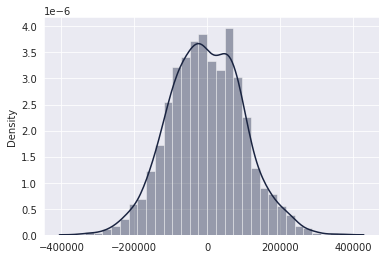

In [ ]:
sns.distplot(y_test - y_pred)

In [ ]:
all = pd.DataFrame({'y_pred': y_pred,
                    'y_test': y_test})

print(all)

            y_pred        y_test
0     1.258935e+06  1.251689e+06
1     8.226946e+05  8.730483e+05
2     1.742214e+06  1.696978e+06
3     9.729370e+05  1.063964e+06
4     9.945460e+05  9.487883e+05
...            ...           ...
1495  7.555650e+05  7.043759e+05
1496  1.168110e+06  1.254938e+06
1497  1.452641e+06  1.434324e+06
1498  6.457971e+05  5.340775e+05
1499  1.364944e+06  1.427202e+06

[1500 rows x 2 columns]


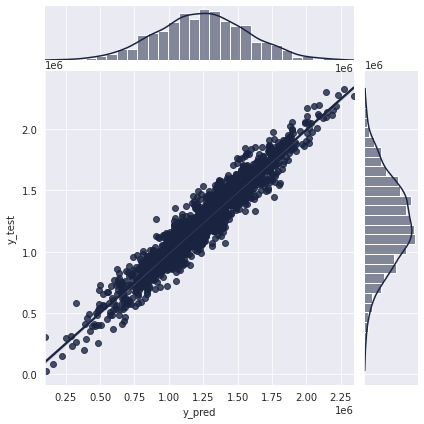

In [ ]:
sns.jointplot(data = all,
              x = 'y_pred',
              y = 'y_test',
              kind = 'reg')

plt.show()

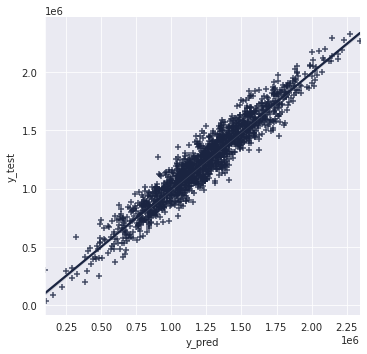

In [ ]:
sns.lmplot(x = 'y_pred',
           y = 'y_test',
           markers = '+',
           data = all)

plt.show()